In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from atlasify import AtlasStyle

In [15]:
f=h5py.File("/home/ppokhare/projects/ctb-stelzer/ppokhare/salt/salt/logs/GN2_20230502-T194918/lightning_logs/version_0/ckpts/epoch=029-val_loss=0.10556__test_ej_PFlow.h5")

track=f["tracks_from_jet"][0]
print(track[0])
VertexIndex = track[0][["VertexIndex","Displaced"]]
print(VertexIndex)

jets=f["jets"]
valid_tracks_bool = track["valid"]
n_tracks_in_jet = np.sum(valid_tracks_bool,axis=1)
valid_tracks = track[valid_tracks_bool]
jets_data = np.repeat(jets["isDisplaced"],n_tracks_in_jet)
tracks_df = pd.DataFrame(valid_tracks["Displaced"])
node_df=pd.DataFrame(track["truthVertexIndex"])
print(node_df)
cum_n_tracks = np.cumsum(n_tracks_in_jet)
grouped_node_df = node_df.groupby(pd.cut(node_df["truthVertexIndex"],[-2,10,22])).group
print(grouped_node_df)


(0, -2, True, -2, 0.9946637, 7.93998e-05, 0.00075787, 0.00449891, 0.)
(0., 0.00449891)


AxisError: axis 1 is out of bounds for array of dimension 1

In [5]:
data = np.array([[(1, 'John'), (2, 'Alice')],
                 [(3, 'Bob'), (4, 'Alice')]],
                dtype=[('id', np.int32), ('name', 'S20')])
mask = data["name"] == b"Alice"
print(mask)
data[mask]
data[mask].dtype.name
data=pd.DataFrame(data)
data.groupby("name")
# understand the masking later! - but is nice! --> dont understand data dimensions of maskin
# how is dtype 2 dimensional? - cause it flattens! nice! 

[[False  True]
 [False  True]]


ValueError: Data must be 1-dimensional

In [87]:
#self.track_variables = self.file[self.track].dtype.names
variables = data.dtype.names
print(variables)

('id', 'name')


In [6]:
data = {
    'City': ['New York', 'Chicago', 'New York', 'Chicago', 'Chicago'],
    'Year': [2019, 2020, 2020, 2019, 2020],
    'Sales': [1000, 1500, 1200, 900, 1800]
}
data=pd.DataFrame(data)
grouped_data=data.groupby("City")
print(grouped_data.
reverted = grouped_data.apply(pd.DataFrame)
print(reverted)

{'Chicago': [1, 3, 4], 'New York': [0, 2]}
       City  Year  Sales
0  New York  2019   1000
1   Chicago  2020   1500
2  New York  2020   1200
3   Chicago  2019    900
4   Chicago  2020   1800


In [2]:
atlas_style = AtlasStyle(
    atlas='Simulation Internal',
    offset=7,
    indent=7,
    font_size=13,
    label_font_size=13,
    sub_font_size=10,
    enlarge=1
)
atlas_style.apply(axes=ax, subtext=desc)

[1, 2, 3]


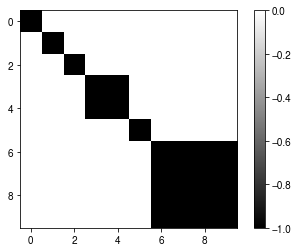

In [9]:
 def get_adj(array):
    u = array
    N = u.shape[0]
    tile = np.tile(u,(N,1))
    adj = ((tile-tile.T == 0) & (tile != -2)).astype(int)
    return -adj


# Example adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 1],
                             [1, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

adjacency_matrix = get_adj(np.array([1,2,3,4,4,6,7,7,7,7]))

# Plot the adjacency matrix
plt.imshow(adjacency_matrix, cmap='gray')

# Add colorbar for reference (optional)
plt.colorbar()

# Show the plot
plt.show()


In [31]:
import numpy as np

# Create a structured NumPy array
dt = np.dtype([('Pileup', int), ('Displaced', int)])
data = np.array([(3,4)], dtype=dt)
print(data)

# Compute the maximum value of the 'age' field
max_age_index =  data.dtype.names[np.argmax(data)]
max_age_value = data[max_age_index]
name_of_max_age = data['name'][max_age_index]

# Print the maximum age and the corresponding name
print("Maximum Age:", max_age_value)
print("Belongs to:", name_of_max_age)


TypeError: data type not ordered

In [33]:
import numpy as np

# Create a structured NumPy array
data = np.array([(1, 5, 3), (4, 2, 6)], dtype=[('field1', int), ('field2', int), ('field3', int)])

# Select one element from the array
element = data[0]

# Find the field with the maximum value inside the element
max_field_index = element.dtype.names[max(range(len(element)), key=lambda i: element[i])]

# Print the field with the maximum value
print("Field with maximum value:", max_field_index)


Field with maximum value: field2
